# Introduce to seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
%matplotlib inline

In [17]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


## Styling

In [18]:
sns.set_theme() # Apply the default

## Numerical Plots
* Distribution: Histogram, KDE, displot
* Bar Plot
* Count Plot
* Face Plot: tạo ra một lưới 2D gồm các bảng được xác định bởi các biến tạo thành các hàng và cột.
* Box Plot: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu thông qua các phần tư của chúng
* Join Plot
* Pair Plot
* Heat Map: một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tương là màu sắc ở 2 chiều
## Distribution Plot

* Univariate distribution of observations

In [4]:
tips_df = sns.load_dataset('tips')

In [5]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Count'>

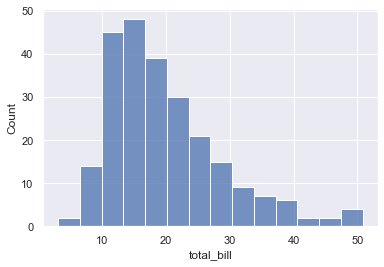

In [19]:
sns.histplot(data=tips_df['total_bill'])

In [11]:
tips_df['total_bill'].value_counts()

13.42    3
21.01    2
18.29    2
10.07    2
20.69    2
        ..
24.27    1
38.07    1
7.51     1
14.52    1
26.88    1
Name: total_bill, Length: 229, dtype: int64

In [10]:
tips_df['total_bill'].value_counts().sort_values(ascending=False)

13.42    3
10.34    2
13.81    2
7.25     2
10.33    2
        ..
11.02    1
27.28    1
11.38    1
17.07    1
26.88    1
Name: total_bill, Length: 229, dtype: int64

### KDE Plot
* A kernel density estimate (KDE) plot is a method for visualizing the distribution of observation in a dataset, analagous to a histogram.
* KDE represents the data using a continuous density curve in one or more dimensions

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

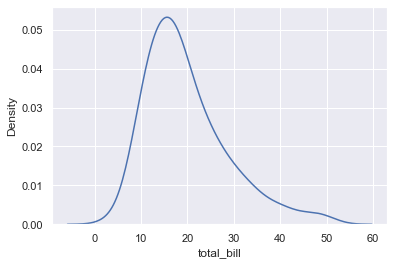

In [20]:
sns.kdeplot(data=tips_df['total_bill'])

### Displot
* Informative distribution sumaries
* Statistical analyses require knowledge about the distribution of variables in your dataset. 
* The seaborn function displot() supports several approaches to visualizing distribution. These include classic techniques like histograms an computationally-intensive approaches like kernel density estimation (kde)

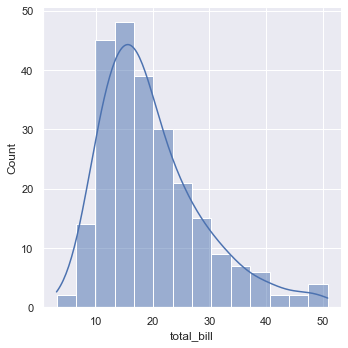

In [21]:
sns.displot(data=tips_df, x="total_bill", kde=True)

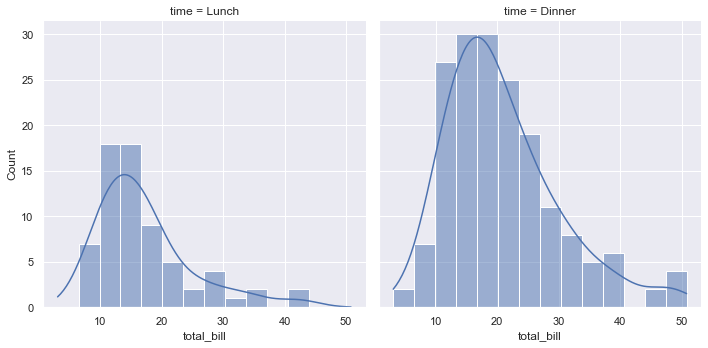

In [22]:
sns.displot(data=tips_df, x="total_bill", col="time", kde=True)

### Categorical Plots
#### Bar Plots

In [23]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='sex', ylabel='tip'>

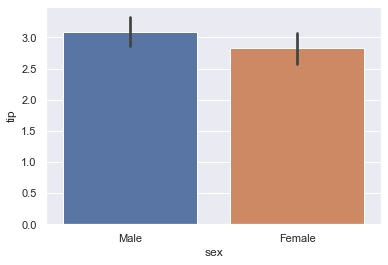

In [24]:
sns.barplot(data=tips_df, x='sex', y='tip', estimator=np.mean)

#### Count Plot

In [25]:
tips_df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

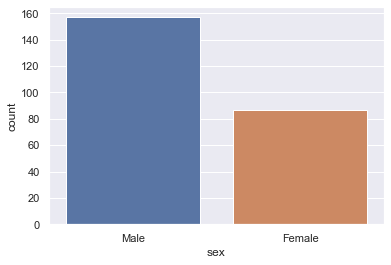

In [26]:
sns.countplot(data=tips_df, x='sex')

### Box Plot
Box Plot is a good indication of how the values in the data are spread out("minium", first quarile (Q1), median, third quartile(Q3), and "maximum")
* Identify outliers
* Check if data is symmertrical
* Determaine how tightly data is grouped

<AxesSubplot:xlabel='day', ylabel='total_bill'>

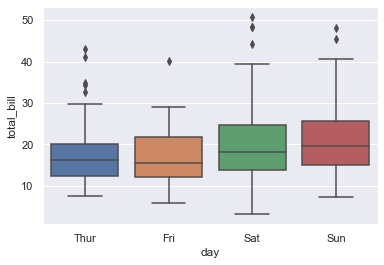

In [30]:
sns.boxplot(data=tips_df, x='day', y='total_bill')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

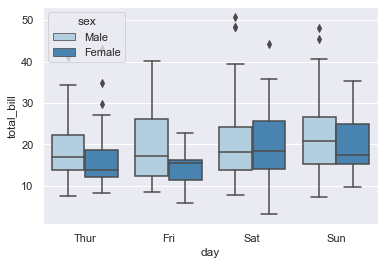

In [33]:
sns.boxplot(data=tips_df, x='day', y='total_bill', hue='sex', palette='Blues')

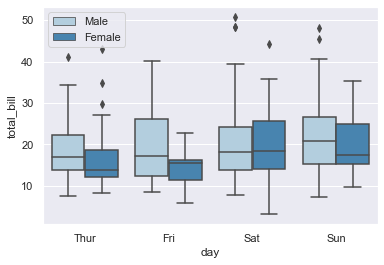

In [34]:
sns.boxplot(data=tips_df, x='day', y='total_bill', hue='sex', palette='Blues')
plt.legend(loc=0)

### Facet Grid
* FaceGrid can be drawn with up to three dimensions: row, col and hue
* The main approach for visualizing data on this grid is with the FaceGrid.map() method.

In [35]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


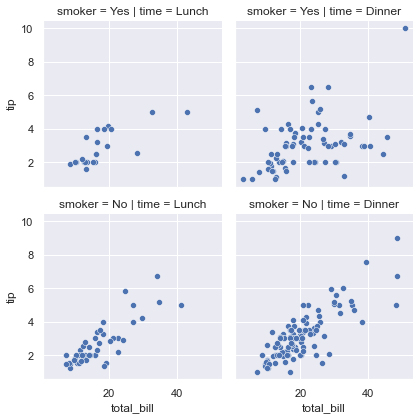

In [36]:
tips_fg = sns.FacetGrid(data=tips_df, row='smoker', col='time') # Create a class instance of Facet Grid class
tips_fg.map(sns.scatterplot, 'total_bill', 'tip')

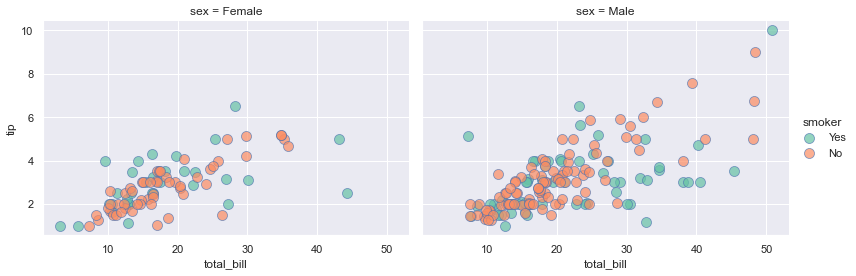

In [48]:
kws = dict(s=100, edgecolor='b', alpha=.7)
new_fg = sns.FacetGrid(data=tips_df, col='sex',
                       hue='smoker',
                      col_order=["Female", "Male"],
                      palette='Set2', 
                      height=4, aspect=1.4)
new_fg.map(sns.scatterplot, 'total_bill', 'tip', **kws)
new_fg.add_legend()

### Joint Plot
* joint distribution between two variables along with each variable's marginal distribution

In [50]:
penguins_df = sns.load_dataset('penguins')

In [51]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


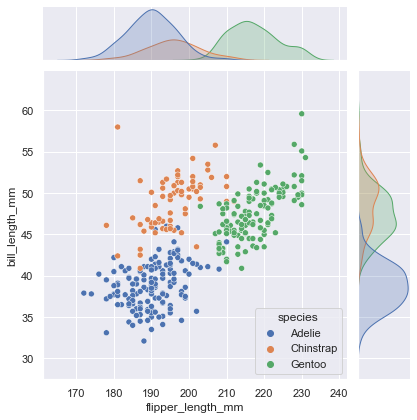

In [54]:
sns.jointplot(data=penguins_df, x='flipper_length_mm', y='bill_length_mm', hue='species')

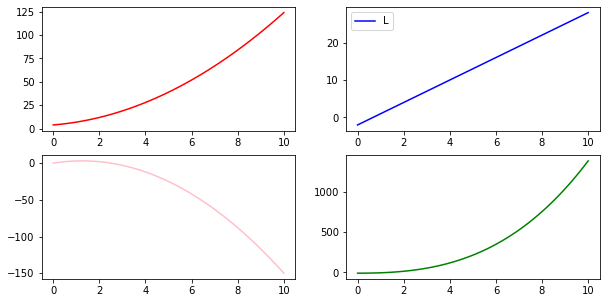

In [16]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,5))

x = np.linspace(0, 10, 100)

ax[0][0].plot(x, x**2 + 2*x + 4, color='red')
ax[0][1].plot(x, 3*x - 2, color='blue')
ax[1][0].plot(x, -2 * x**2 + 5*x, color='pink')
ax[1][1].plot(x, x ** 3 + 4*x**2 - 10, color='green')

ax[0][1].legend('Linear Regression')